# **PERFORMING 'EXPLORATORY DATA ANALYSIS' (EDA) ON CUSTOMER TRANSACTIONS DATASET**

**IMPORTING THE REQUIRED MODULES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from datetime import date
import calendar
import matplotlib.pyplot as plt
%matplotlib inline

**READING THE CSV FILE**

In [2]:
df = pd.read_csv('dataset.csv')

**DISPLAYING THE FIRST FEW ROWS OF THE DATASET**

In [3]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


**LOOKING FOR NULL VALUES IN THE DATASET**

In [4]:
df.isna().sum()

Customer ID              0
Name                     0
Surname                  0
Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

**IT CAN BE SEEN THAT ONLY THE GENDER SERIES HAS NULL VALUES, LET'S SEE HOW MANY UNIQUE VALUES IT HAS!**

In [5]:
df.Gender.unique()

array(['F', nan, 'M'], dtype=object)

**SO IT DOES HAVE nan VALUES. LET'S SEE HOW MANY ARE THERE!**

In [6]:
df['Gender'].isna().sum()

5047

**5047 VALUES IN GENDER SERIES ARE NULL! LET'S SEE HOW MANY VALUES THERE ARE IN TOTAL IN THE DATAFRAME.**

In [7]:
df.shape

(50000, 9)

**WE NEED TO GET AN ESTIMATE ABOUT THE NUMBER OF MALE AND FEMALE ROWS IN ORDER TO DO SOMETHING ABOUT THE NULL VALUES**

In [8]:
df['Gender'].value_counts()

Gender
F    22713
M    22240
Name: count, dtype: int64

**FEMALES ARE A LITTLE HIGHER IN NUMBER THAN MALES. IT'S BETTER TO FILL IN RANDOMLY THESE TWO VALUES IN THE NULL CELLS.**

In [9]:
df.loc[df['Gender'].isna(), 'Gender'] = [i for i in np.random.choice(['F','M'], df['Gender'].isna().sum())]

**NOW LET'S CHECK THE NUMBER OF NULL VALUES, WHICH SHOULD BE ZERO.**

In [10]:
df['Gender'].isna().sum()

0

**THE FEMALE TO MALE RATIO IS ALMOST SIMILAR** 

In [11]:
df['Gender'].value_counts()

Gender
F    25263
M    24737
Name: count, dtype: int64

In [12]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,F,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


**NOW THERE ARE NO NULL VALUES IN THE DATAFRAME**

In [13]:
df.isna().sum()

Customer ID           0
Name                  0
Surname               0
Gender                0
Birthdate             0
Transaction Amount    0
Date                  0
Merchant Name         0
Category              0
dtype: int64

In [14]:
df.keys()

Index(['Customer ID', 'Name', 'Surname', 'Gender', 'Birthdate',
       'Transaction Amount', 'Date', 'Merchant Name', 'Category'],
      dtype='object')

**THIS IS A HISTOPLOT SHOWING THE VARIATION IN THE AMOUNT OF TRANSACTION AMOUNT**

<Axes: xlabel='Transaction Amount', ylabel='Count'>

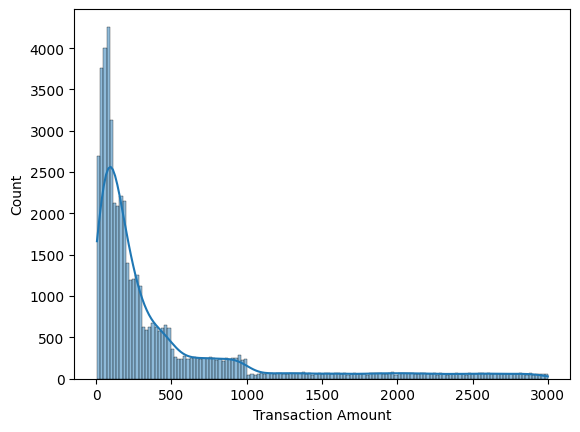

In [15]:
sn.histplot(df['Transaction Amount'],kde=True)

**HERE'S A PIE CHART DISPLAYING THE PROPORTION OF PEOPLE BY GENDER, ON HOW MUCH TRANSACTION AMOUNT THEY HAVE**

<Axes: ylabel='Transaction Amount'>

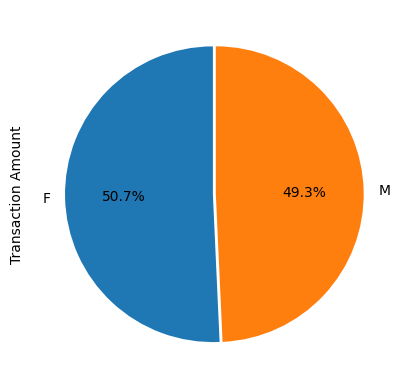

In [16]:
df.groupby('Gender')['Transaction Amount'].sum().plot(kind="pie", explode=(0.01,0.01), autopct='%1.1f%%',startangle=90)

**CALCULATING AGE OF CUSTOMERS FROM THEIR BIRTHDATE FOLLOWED BY THE AGE RANGE**

In [17]:
def calculateAge(birthDate):
    today = date.today()
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day))
    return age

def checkAgeRange(age):
    las_dig=age%10
    range_age=str.format('{0}-{1}',age-las_dig,((age-las_dig)+10))
    return range_age

**CREATING A NEW SERIES (COLUMN) IN THE DATAFRAME BY THE NAME 'AGE' AND 'AGE RANGE'** 

In [18]:
l = []
for i in df['Birthdate']:
    y,m,d = i.split('-')
    y,m,d = int(y),int(m),int(d)
    if y==int('023'):
        y=2023
    l.append(calculateAge(date(y,m,d)))
df['Age']=l

In [19]:
df['Age Range'] = df['Age'].apply(checkAgeRange)

In [20]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Age,Age Range
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,21,20-30
1,26381,Michelle,Phelps,F,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,37,30-40
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,41,40-50
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,45,40-50
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,71,70-80


In [21]:
df['Age'].unique()

array([21, 37, 41, 45, 71, 22, 46, 54, 65, 48, 51, 19, 56, 60, 73, 23, 27,
       29, 31, 63, 66, 20, 28, 44, 61, 52, 69, 42, 35, 25, 64, 24, 40, 59,
       67, 50, 18, 32, 55, 70, 53, 26, 47, 72, 57, 58, 49, 36, 34, 43, 62,
       30, 38, 74, 39, 68, 33], dtype=int64)

**PLOTTING A GRAPH BETWEEN AGE AND TRANSACTION AMOUNT TO CHECK HOW ARE THESE TWO PARAMETERS RELATED**

<Axes: xlabel='Age Range'>

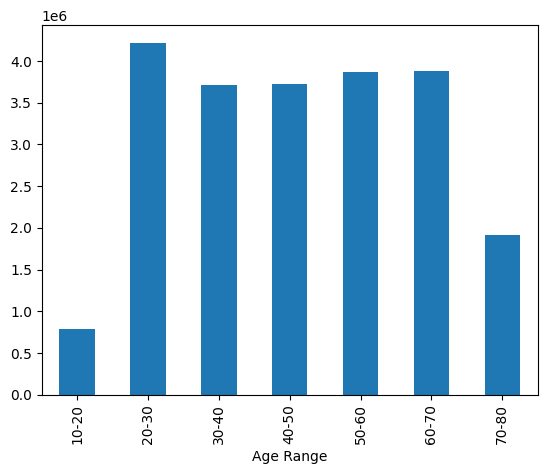

In [22]:
df.groupby('Age Range')['Transaction Amount'].sum().plot(kind='bar')

**PLOTTING A BAR CHART TO FIGURE OUT HOW MUCH IN TOTAL WAS SPENT ON EACH CATEGORY** 

<Axes: ylabel='Transaction Amount'>

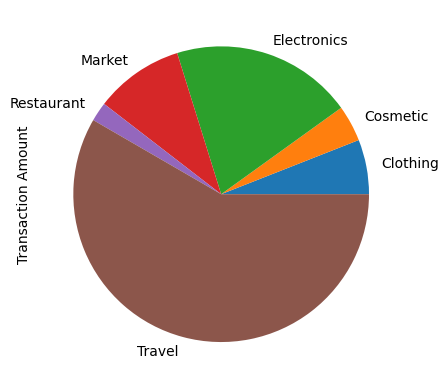

In [30]:
df.groupby('Category')['Transaction Amount'].sum().plot(kind='pie')

**CREATING A NEW SERIES NAMED 'MONTH' IN THE DATAFRAME**

In [24]:
def convert(df):
    l=[]
    for j in df:
        j = j.split('-')
        l.append(calendar.month_name[int(j[1])])
    return l

df['Month'] = convert(df['Date'])

In [25]:
months = sorted(df['Month'], key=list(calendar.month_name).index)

In [26]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Age,Age Range,Month
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,21,20-30,April
1,26381,Michelle,Phelps,F,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,37,30-40,July
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,41,40-50,September
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,45,40-50,January
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,71,70-80,June


**UNDERSTANDING THE EFFECT OF TIME OF THE YEAR ON TRANSACTION AMOUNT**

In [27]:
df.groupby('Month')['Transaction Amount'].sum()

Month
April        2289731.30
August       2391450.20
February     2148030.95
January      2345228.21
July         2475041.53
June         2254592.41
March        2396963.31
May          2460816.56
October      1069861.84
September    2274245.66
Name: Transaction Amount, dtype: float64

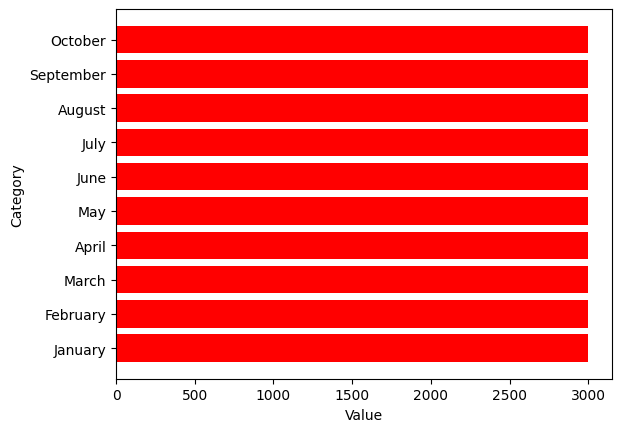

In [28]:
plt.barh(months, df.loc[df['Month'].isin(months)]['Transaction Amount'], color='r')
plt.ylabel('Category')
plt.xlabel('Value')
plt.show()

**IT CAN BE CLEARLY SEEN THAT THE SUM TOTAL OF TRANSACTION AMOUNT IN A SPECIFIC MONTH IS ALMOST EQUAL TO EVERY OTHER MONTH**